In [32]:
import os
import json
from pprint import pprint as pp
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np

%matplotlib inline

In [20]:
df = pd.read_pickle('tag_prop.pkl')
tag_mat = df.as_matrix(columns=None)

In [21]:
df = df.transpose()

In [152]:
tag_names = df.columns.values 

In [37]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(df)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 4391
[t-SNE] Computed conditional probabilities for sample 2000 / 4391
[t-SNE] Computed conditional probabilities for sample 3000 / 4391
[t-SNE] Computed conditional probabilities for sample 4000 / 4391
[t-SNE] Computed conditional probabilities for sample 4391 / 4391
[t-SNE] Mean sigma: 0.105719
[t-SNE] Iteration 10: error = 24.3516949, gradient norm = 0.0599747
[t-SNE] Iteration 20: error = 21.3817451, gradient norm = 0.0715081
[t-SNE] Iteration 30: error = 19.6263101, gradient norm = 0.0633993
[t-SNE] Iteration 40: error = 18.9811742, gradient norm = 0.0600351
[t-SNE] Iteration 50: error = 18.8221714, gradient norm = 0.0574158
[t-SNE] Iteration 60: error = 16.3715799, gradient norm = 0.0576098
[t-SNE] Iteration 70: error = 16.0620334, gradient norm = 0.0627910
[t-SNE] Iteration 80: error = 16.3251461, gradient norm = 0.0643289
[t-SNE] Iteration 90: error = 16.5297517, gradient norm =

In [173]:
cluster_n = 30
k_means = KMeans(n_clusters=cluster_n, init='k-means++', max_iter=100, n_init=1,)
k_means.fit(df)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=30, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [174]:
k_means.labels_
cluster_bool = list()
for i in range(cluster_n):
    cur_cluster = k_means.labels_ == i
    cluster_bool.append(cur_cluster)

In [176]:
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))}

cmap = mcolors.LinearSegmentedColormap(
'my_colormap', cdict, 100)
base_val = 100

In [177]:
qmaps = ['Accent', 'Dark2', 'Paired', 'Pastel1','Pastel2', 'Set1', 'Set2', 'Set3', 'Spectral']
cmap_name = qmaps[8]
cmap=plt.get_cmap(cmap_name)
base_val = 255


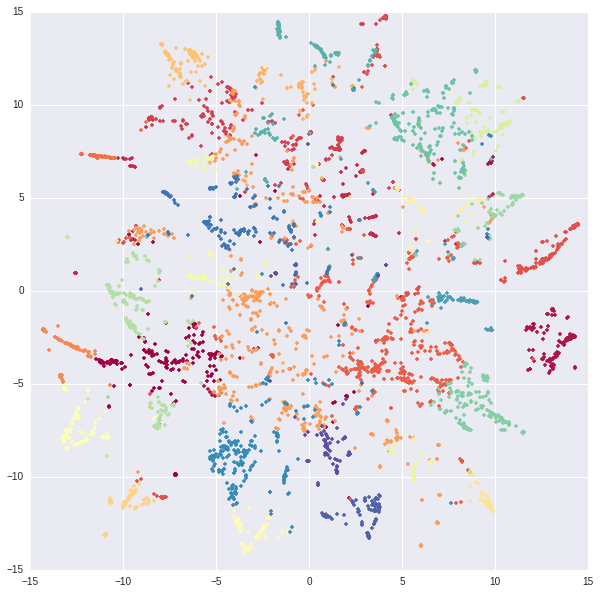

In [178]:
qmaps = ['Accent', 'Dark2', 'Paired', 'Pastel1','Pastel2', 'Set1', 'Set2', 'Set3', 'Spectral']
cmap_name = 'Dark2'
cmap=plt.get_cmap(cmap_name)
base_val = 255

fig,ax = plt.subplots(1,1,figsize=(10, 10))
for i in range(cluster_n):
    cmap_val = int(( (i * 1.0) / (cluster_n - 1)) * base_val)
    ax.plot(X_embedded[cluster_bool[i], 0], X_embedded[cluster_bool[i], 1], marker = '.', ls = '', color = cmap(cmap_val))



In [179]:
order_centroids = k_means.cluster_centers_.argsort()[:, ::-1]

In [184]:
'''print out the top labels in each category'''
top_n_labels = 4
order_centroids.shape
for i in range(order_centroids.shape[0]):
    tn = tag_names[order_centroids[i,0:top_n_labels]]
    tn_out = [x.encode('ascii')for x in tn]
    print tn_out

['Adventure', 'Puzzle', 'Indie', 'Point & Click']
['Free to Play', 'Action', 'Multiplayer', 'Massively Multiplayer']
['Simulation', 'Action', 'Indie', 'Casual']
['Strategy', 'Simulation', 'Casual', 'Indie']
['Casual', 'Indie', 'Puzzle', 'Strategy']
['Indie', 'Action', 'Platformer', 'Adventure']
['Simulation', 'Flight', 'Trains', 'Management']
['Adventure', 'Point & Click', 'Mystery', 'Hidden Object']
['Action', 'Adventure', 'RPG', 'Singleplayer']
['Strategy', 'Action', 'Indie', 'Tower Defense']
['Strategy', 'RTS', 'World War II', 'Historical']
['Casual', 'Puzzle', 'Hidden Object', 'Agriculture']
['Indie', 'Platformer', 'Puzzle', 'Puzzle-Platformer']
['Sports', 'Simulation', 'Racing', 'Indie']
['Action', 'FPS', 'Third-Person Shooter', 'Shooter']
['Adventure', 'Casual', 'Hidden Object', 'Point & Click']
['RPG', 'Strategy', 'Adventure', 'Action']
['Utilities', 'Design & Illustration', 'Video Production', 'Software']
['Early Access', 'Action', 'Indie', 'Adventure']
['Hidden Object', 'Puzzl